<a href="https://colab.research.google.com/github/Edgar-IAH/IA-Grupo-45/blob/main/Arboldedecision_Equipo45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 6**
### **Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

* Eduardo Aldair Ahumada García Jurado - A01422929
* Edgar Rodolfo Escobar Gomez - A01793900
* Walter André Hauri Rosales - A01794237
* Héctor Salvador Montañez Alvarez - A01332665
* Jaime Andres Palacios Campaña - A01794023

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [49]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import confusion_matrix, make_scorer

from graphviz import Source

# Adicionales--
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

# Usados para pruebas unitarias de código
from sklearn.datasets import make_moons, make_circles


# **Ejercicio-1.** 

## Carga de datos

In [2]:
# Cargamos la base de datos con los nombres de las columnnas traducidos a Inglés
# Este archivo se encuentra en nuestro repositorio github público:
# https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/main/SouthGermanCredit_Translated.csv

datos = pd.read_csv("https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/main/SouthGermanCredit_Translated.csv")
### USAR LA SIGUIENTE LINEA UNICAMENTE CUANDO EL ARCHIVO DE DATOS SEA LOCAL
#datos = pd.read_csv("SouthGermanCredit_Translated.csv")

datos.describe()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


# **Ejercicio-2.**

## Creación de la estructuras de datos de entrenamiento (_train) y prueba (_test)


In [3]:
# imputacion por moda - Categóricos
datos_cat = [
    "status",
    "credit_history",
    "purpose",
    "savings",
    "personal_status_sex",
    "other_debtors",
    "other_installment_plans",
    "housing",
]

# imputacion por moda - Ordinales
datos_ord = [
    "employment_duration",
    "installment_rate",
    "present_residence",
    "property",
    "number_credits",
    "job",
]

# imputacion por media/mediana - Numéricos
datos_num = ["duration", "amount", "age"]

# imputacion por moda - Binarios
datos_bin = ["people_liable", "telephone", "foreign_worker"]

In [4]:
# Los datos de entrada son todas las columnas excepto la última
X = datos.iloc[:, :-1]
# La variable de salida se encuentra en la última columna
Y = datos.iloc[:, -1]

# Usamos la función train_test_split de la libreria sklearn
# Fijamos el generador de números aleatorios con el fin de que los conjuntos
# no cambien en cada corrida
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.15, random_state=45
)

# Chequeamos el tamaño de los conjuntos obtenidos
print(X_train.shape, ": dimensión de datos de entrada de entrenamiento y validación")
print(X_test.shape, ": dimensión de datos de entrada de prueba")
print(
    Y_train.shape, ": dimensión de variable de salida para entrenamiento y validación"
)
print(Y_test.shape, ": dimensión de variable de salida para prueba")


(850, 20) : dimensión de datos de entrada de entrenamiento y validación
(150, 20) : dimensión de datos de entrada de prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


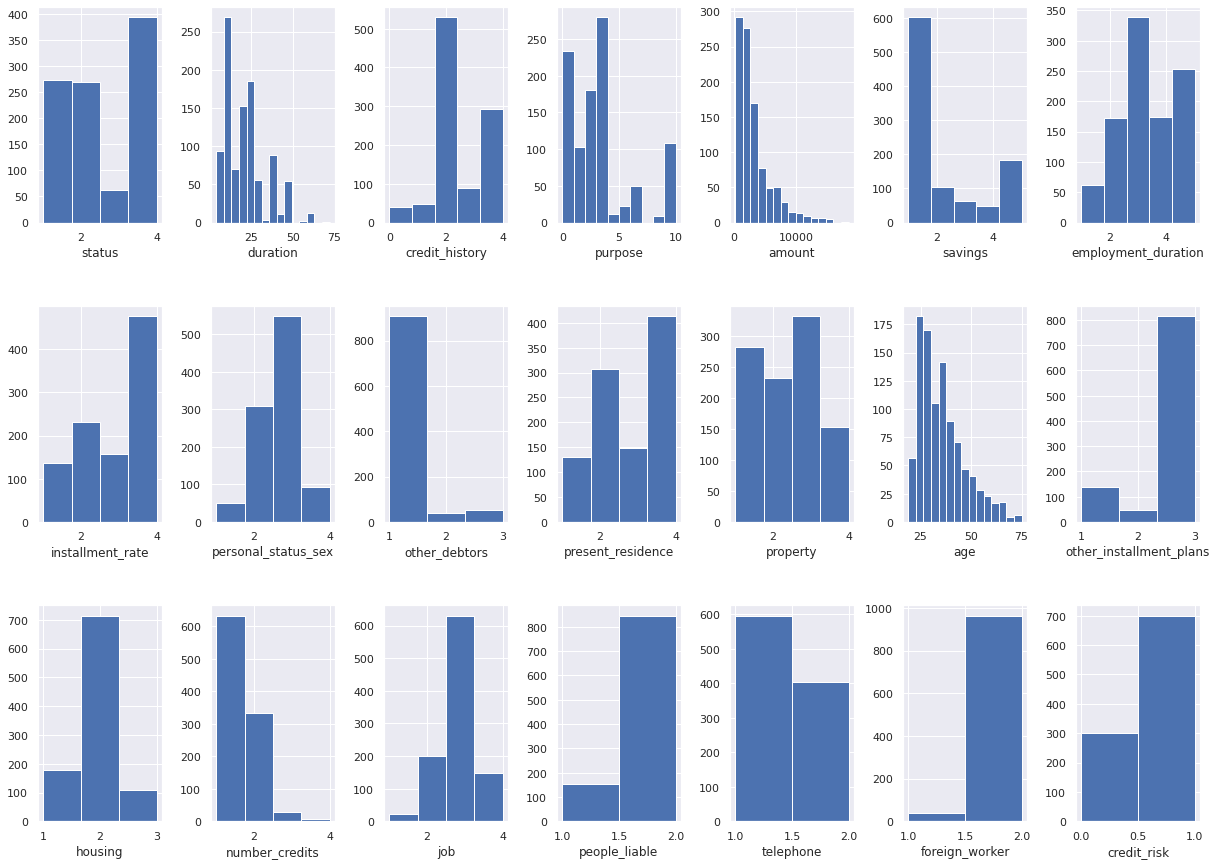

In [5]:
# En esta sección creamos los histogramas sin transformaciones
# para darnos una idea de las distribuciones

# Tamaño de la gráfica
sns.set(rc={"figure.figsize": (17, 12)})
# Crea el espacio de trabajo como una matriz de 3 x 7 = 21 variables
fig, axes = plt.subplots(3, 7)
# Espacio entre gráficas
fig.tight_layout(h_pad=5.0)

# Grafica los histogramas uno por uno
for k in range(0, 21):
    # Posición sequencial. Van de 1 a 21 en este caso (no 0)
    plt.subplot(3, 7, k + 1)
    # Número de valores diferentes.
    buckets = datos.iloc[:, k].nunique()
    # Si el número de valores es mayor de 10, declara el número de buckets como 15
    # si es <=10 usa ese número de buckets
    if buckets > 10:
        buckets = 15
    # Crea el histograma
    datos.iloc[:, k].hist(bins=buckets)
    # Nombra el eje X de acuerdo a la columna que está siendo visualizada
    plt.xlabel(datos.columns[k])
# Despliega la figura con las 21 gráficas
plt.show()


# **Ejercicio-3.**
## Primera approximación
## Transformaciones:
* categórica (categorical),
* ordinal (discretized quantitative),
* numérica (quantitative), y 
* binaria (binary).


In [6]:
#Chequeamos si existen datos nulos. No esperamos ninguno ya que la base de datos
#que estamos usando ya ha sido limpiada anteriormente
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [7]:
datos


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [8]:
for c in datos_cat+datos_bin:
    print(datos[c].value_counts())


4    394
1    274
2    269
3     63
Name: status, dtype: int64
2    530
4    293
3     88
1     49
0     40
Name: credit_history, dtype: int64
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: purpose, dtype: int64
1    603
5    183
2    103
3     63
4     48
Name: savings, dtype: int64
3    548
2    310
4     92
1     50
Name: personal_status_sex, dtype: int64
1    907
3     52
2     41
Name: other_debtors, dtype: int64
3    814
1    139
2     47
Name: other_installment_plans, dtype: int64
2    714
1    179
3    107
Name: housing, dtype: int64
2    845
1    155
Name: people_liable, dtype: int64
1    596
2    404
Name: telephone, dtype: int64
2    963
1     37
Name: foreign_worker, dtype: int64


In [9]:
datos[datos_bin]


,people_liable,telephone,foreign_worker
0,2,1,2
1,1,1,2
2,2,1,2
3,1,1,1
4,2,1,1
...,...,...,...
995,1,1,2
996,2,1,2
997,2,2,2
998,2,2,2


In [10]:

# Observación de los valores únicos en todas las columnas.
# Comparamos con los valores registrados en el archivo fuente "codetable.txt"
# con el fin de asegurarnos de que no haya valores en los datos que no estén
# documentados en el mencionado archivo fuente.
# Resultado negativo, lo cual es bueno. Todos los valores usados en los datos
# están referenciados en la en archivo fuente "codetable.txt".
for v in datos.columns:
    print(v)
    print(datos[v].unique())
    print("-----")


status
[1 2 4 3]
-----
duration
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
-----
credit_history
[4 2 3 0 1]
-----
purpose
[ 2  0  9  3  1 10  5  4  6  8]
-----
amount
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366   763  3976  6260  1919  2603   936  3062
  4795  5842  2063  1459  1213  5103   874  

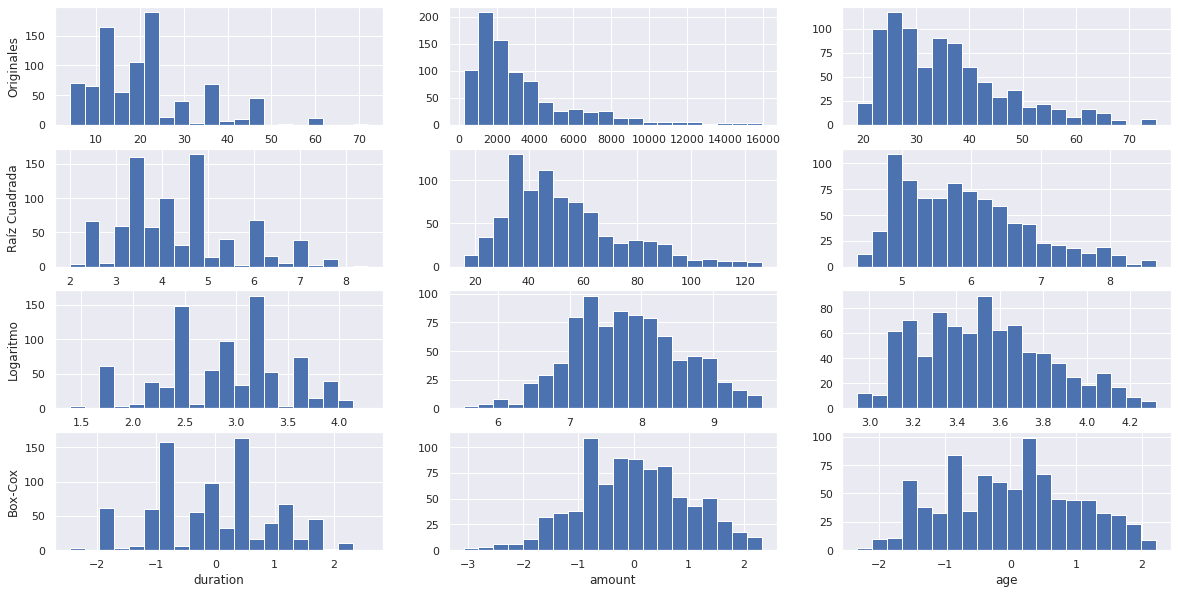

In [11]:
# Mediante histogramas revisamos la distribución de frecuencias para encontrar 
# cual daría la mejor simetria pos-transformación de las variable numéricas

sns.set(rc={"figure.figsize": (20, 10)})
fig, axes = plt.subplots(3, 3)

for k in range(0, 3):

    # Datos originales ---------------------------------------------------------
    plt.subplot(4, 3, k + 1)
    Transf0 = (
        X_train[datos_num].iloc[:, k].to_numpy().reshape(-1, 1)
    )  # Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf0, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Originales")

    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(4, 3, k + 4)
    Transf1 = np.sqrt(
        Transf0
    )  # Se debe aplica la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf1, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Raíz Cuadrada")

    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(4, 3, k + 7)
    Transf2 = np.log(
        Transf0
    )  # Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf2, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Logaritmo")

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(4, 3, k + 10)
    Transf4 = power_transform(
        (X_train[datos_num[k]]).values.reshape(-1, 1), method="box-cox"
    )  #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf4, bins=20
    )  #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Box-Cox")


En el pánel anterior observamos que la transformación logaritmica mejora la simetría de las distribuciones.

En el siguiente pánel comparamos valores extremos ("outliers") usando un diagrama box-plot, antes y después de la transformación logaritmica para
confirmar la mejora.

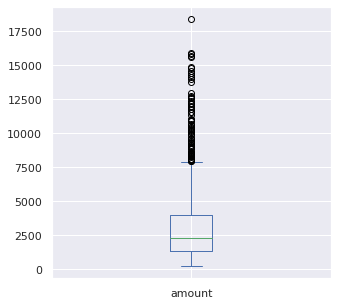

In [12]:

#Redimensiona el tamaño para las siguientes figuras
sns.set(rc={"figure.figsize": (5, 5)})

# Box-plot de los datos numéricos sin transformación
datos["amount"].plot(kind="box", layout=(1,1), figsize=(5,5),sharex=False,sharey=False) 
plt.show()


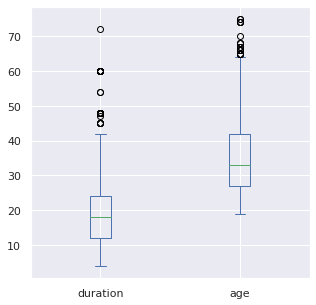

In [13]:
datos[["duration", "age"]].plot(kind="box", layout=(1,1), figsize=(5,5),sharex=False,sharey=False)
plt.show()


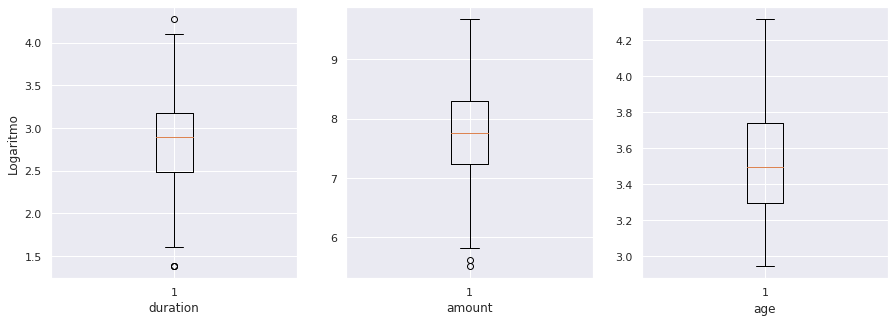

In [14]:
# Box-plot de los datos numéricos usando la transformación logarítmica

#Redimensiona el tamaño para las siguientes figuras
sns.set(rc={"figure.figsize": (15, 5)})

for k in range(0, 3):
    plt.subplot(1, 3, k + 1)
    # Datos originales ---------------------------------------------------------
    Transf0 = (
        X_train[datos_num].iloc[:, k].to_numpy().reshape(-1, 1)
    )  # Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    Transf2 = np.log(
        Transf0
    )  # Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.boxplot(Transf2)
    plt.xlabel(datos_num[k])
    if k == 0:
        plt.ylabel("Logaritmo")

plt.show()


In [15]:
datos.isnull().sum()


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [16]:

# En esta sección de código definimos las transformaciones
# Transformaciones a factores categóricos y binarios de entrada:

cat_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
        ("OneHotE", OneHotEncoder(handle_unknown="ignore")),
    ]
)
cat_pipeline_nombres = [
    "status",
    "credit_history",
    "purpose",
    "savings",
    "personal_status_sex",
    "other_debtors",
    "other_installment_plans",
    "housing",
]


# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(
    steps=[
        ("impMediana", SimpleImputer(strategy="median")),
        ("log", FunctionTransformer(np.log)),
        ("escalaNum", MinMaxScaler()),
    ]
)
num_pipeline_nombres = ["duration", "amount", "age"]


# Transformaciones a factores ordinales de entrada:
ord_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
    ]
)
ord_pipeline_nombres = [
    "employment_duration",
    "installment_rate",
    "present_residence",
    "property",
    "number_credits",
    "job",
]

bin_pipeline_nombres = ["people_liable", "telephone", "foreign_worker"]


# Conjuntamos las transformaciones que se aplicarán a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("catpipe", cat_pipeline, cat_pipeline_nombres+bin_pipeline_nombres),
        ("numpipe", num_pipeline, num_pipeline_nombres),
        ("ordpipe", ord_pipeline, ord_pipeline_nombres),
    ],
    remainder="passthrough",
)


# **Ejercicio-4.**
## Entrenamiento usando validación cruzada
## Modelos:
* Regresión Logística, 
* Árbol de Decisión, y 
* Bosque Aleatorio.

###*Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características:*
###*a. Usa los parámetros predeterminados de cada modelo.*



In [17]:
def get_models():
    modelos = list()
    nombres = list()

    # LR - Regresión Logística:
    modelos.append(LogisticRegression(max_iter=3000))
    nombres.append("LR")

    # DT - Árbol de Decisión:
    modelos.append(DecisionTreeClassifier())
    nombres.append("DT")

    # RF - Random Forest:
    modelos.append(RandomForestClassifier())
    nombres.append("RF")

    return modelos, nombres


###*4.b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).*

In [18]:
# Funciones para generar scores
def accuracy(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    
    tot = cm.sum()

    vp = cm[1, 1]
    vn = cm[0, 0]

    score = (vp + vn) / tot

    return score


def precision(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1]
    vp = cm[1, 1]

    score = vp / (vp + fp)

    return score


def recall(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fn = cm[1, 0]
    vp = cm[1, 1]

    score = vp / (vp + fn)

    return score


def f1(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1]
    fn = cm[1, 0]
    vp = cm[1, 1]

    score = 2 * vp / (2 * vp + fp + fn)

    return score


def gmean(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    vn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    vp = cm[1, 1]

    recall = vp / (vp + fn)
    specifity = vn / (vn + fp)

    score = np.sqrt(recall * specifity)

    return score


In [19]:

# Código de prueba de muestras funciones de métricas
#y_true = ['cat', 'dog', 'cat', 'cat', 'dog', 'dog','dog','cat','cat','dog']
#y_pred = ['dog', 'dog', 'cat', 'cat','dog', 'cat','dog','dog','cat','dog']
y_true = [2, 0, 2, 2, 0, 2]
y_pred = [0, 0, 2, 2, 0, 2]
cm = confusion_matrix(y_true, y_pred)
print(cm)
print('accuracy',accuracy(y_true, y_pred))
print('precision',precision(y_true, y_pred))
print('recall',recall(y_true, y_pred))
print('f1',f1(y_true, y_pred))
print('gmean',gmean(y_true, y_pred))

[[2 0]
 [1 3]]
accuracy 0.8333333333333334
precision 1.0
recall 0.75
f1 0.8571428571428571
gmean 0.8660254037844386


###*4.c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.*

###*4.d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.*

In [20]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

#Define la validación cruzada con los paràmetros requeridos:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=45)

for i in range(len(modelos)):

    pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", modelos[i])])
    metricas = {
        "accuracy": make_scorer(accuracy),
        "precision": make_scorer(precision),
        "recall": make_scorer(recall),
        "f1": make_scorer(f1),
        "gmean": make_scorer(gmean),
    }

    scores = cross_validate(
        pipeline, X_train, Y_train, scoring=metricas, cv=cv, return_train_score=True,
    )

    resultados.append(scores)
    print('===============================\n',nombres[i],':\n===============================')
    print('ENTRENAMIENTO:')
    print('mean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (
                                                                          np.mean(scores['train_accuracy']),
                                                                          np.std(scores['train_accuracy']),
                                                                          np.mean(scores['train_precision']),
                                                                          np.std(scores['train_precision']), 
                                                                          np.mean(scores['train_recall']),
                                                                          np.std(scores['train_recall']),
                                                                          np.mean(scores['train_f1']),
                                                                          np.std(scores['train_f1']),
                                                                          np.mean(scores['train_gmean']),
                                                                          np.std(scores['train_gmean']),
                                                                          ))
    
    print('VALIDACION (interna al método de validación cruzada):')
    print('mean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']), 
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_f1']),
                                                                          np.std(scores['test_f1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean']),
                                                                          ))
    
    

 LR :
ENTRENAMIENTO:
mean Accuracy: 0.782 (0.0095)
mean Precision: 0.810 (0.0083)
mean Recall: 0.899 (0.0069)
mean F1-score: 0.852 (0.0060)
Gmean: 0.678 (0.0183)

VALIDACION (interna al método de validación cruzada):
mean Accuracy: 0.747 (0.0258)
mean Precision: 0.789 (0.0174)
mean Recall: 0.870 (0.0309)
mean F1-score: 0.827 (0.0186)
Gmean: 0.632 (0.0396)

 DT :
ENTRENAMIENTO:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1-score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

VALIDACION (interna al método de validación cruzada):
mean Accuracy: 0.677 (0.0266)
mean Precision: 0.772 (0.0244)
mean Recall: 0.765 (0.0394)
mean F1-score: 0.768 (0.0214)
Gmean: 0.598 (0.0478)

 RF :
ENTRENAMIENTO:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1-score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

VALIDACION (interna al método de validación cruzada):
mean Accuracy: 0.738 (0.0174)
mean Precision: 0.766 (0.0132)
mean

###*diagramas de caja y bigotes de los tres modelos con la métrica "recall”.*

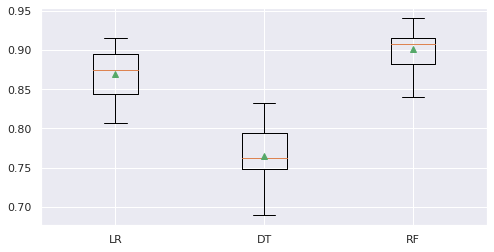

In [21]:
#Imprimimos las metricas
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()

for i in range (len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

###*¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.*

FALTA

###*En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:*

###*i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con sus hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”.*

###*iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va  incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.*

In [22]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, eje_y):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(eje_y)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()


---------------------------
 MODELO: LR 
---------------------------


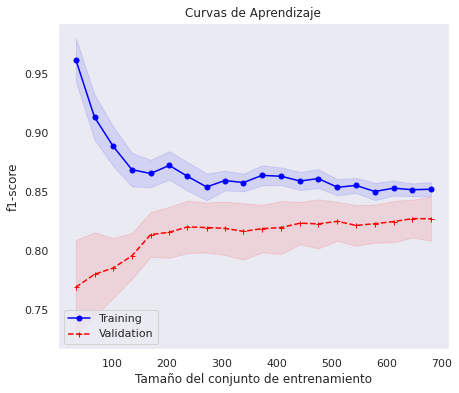

---------------------------
 MODELO: DT 
---------------------------


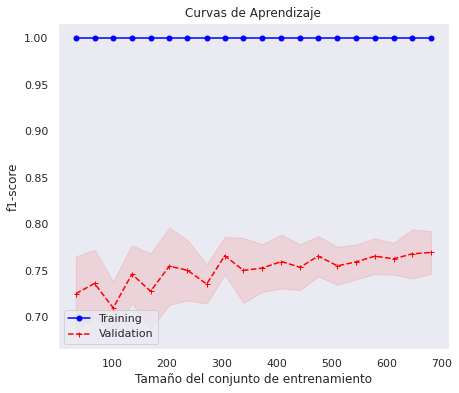

---------------------------
 MODELO: RF 
---------------------------


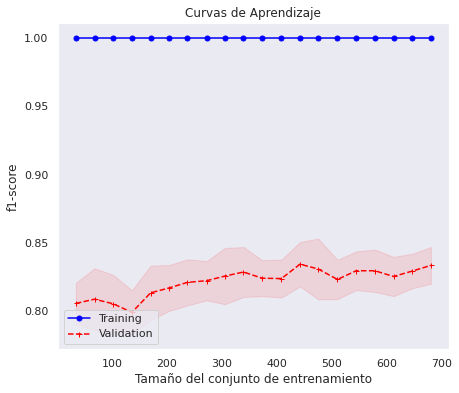

In [24]:

delta_train_sz = np.linspace(.05, 1, 20)

for i in range(len(modelos)):
    #CODIGO DE PRUEBA
    #pipeline = Pipeline(steps=[('escalar',StandardScaler()),('modelo',modelos[i]),])
    metricas = {"f1": make_scorer(f1)}

    pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", modelos[i])])
#    metricas = {
#        "accuracy": make_scorer(accuracy),
#        "precision": make_scorer(precision),
#        "recall": make_scorer(recall),
#        "f1": make_scorer(f1),
#        "gmean": make_scorer(gmean),
#    }

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                        X = X_train,
                                                        y = Y_train,
                                                        scoring=make_scorer(f1),
                                                        cv = cv,
                                                        train_sizes = delta_train_sz,
                                                        random_state=45)
      
    # Obtenemos el gráfico con las curvas de aprendizaje:
    print('---------------------------\n','MODELO: '+nombres[i],'\n---------------------------')
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'f1-score')



###*ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.*

dict_keys(['memory', 'steps', 'verbose', 'ct', 'm', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__catpipe', 'ct__numpipe', 'ct__ordpipe', 'ct__catpipe__memory', 'ct__catpipe__steps', 'ct__catpipe__verbose', 'ct__catpipe__impModa', 'ct__catpipe__OneHotE', 'ct__catpipe__impModa__add_indicator', 'ct__catpipe__impModa__copy', 'ct__catpipe__impModa__fill_value', 'ct__catpipe__impModa__missing_values', 'ct__catpipe__impModa__strategy', 'ct__catpipe__impModa__verbose', 'ct__catpipe__OneHotE__categories', 'ct__catpipe__OneHotE__drop', 'ct__catpipe__OneHotE__dtype', 'ct__catpipe__OneHotE__handle_unknown', 'ct__catpipe__OneHotE__sparse', 'ct__numpipe__memory', 'ct__numpipe__steps', 'ct__numpipe__verbose', 'ct__numpipe__impMediana', 'ct__numpipe__log', 'ct__numpipe__escalaNum', 'ct__numpipe__impMediana__add_indicator', 'ct__numpipe__impMediana__copy', 'ct__numpipe__impMediana__fill_value',

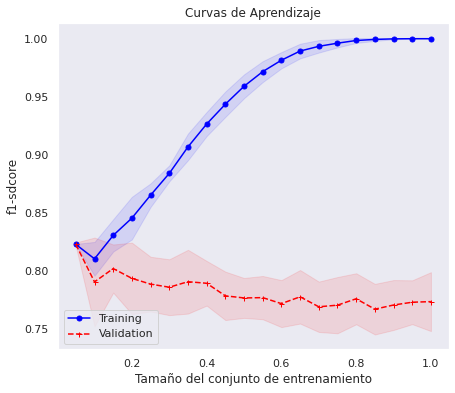

In [25]:

modelo = modelos[1]
pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", modelo)])

max_depth_range = range(1, 21)

#Usado para depurar código cuando usamos validation_curve
#print(pipeline.get_params().keys())

train_scores, test_scores = validation_curve(
    estimator=pipeline, 
    X=X_train,
    y=Y_train,
    param_name='m__max_depth',
    param_range=max_depth_range,
    scoring=make_scorer(f1), 
    cv=cv
    )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(7,6))

plt.plot(delta_train_sz, train_mean, color='blue', marker='o', markersize=5, label='Training')
plt.fill_between(delta_train_sz, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
plt.plot(delta_train_sz, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(delta_train_sz, test_mean + test_std, test_mean - test_std, alpha=0.1, color='red')
    
plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('f1-score')
plt.grid()
plt.legend(loc='lower left')
plt.show()


#**Ejercicio-5.**
#Mejoramiento de los hiperparámetros y sobreentrenamiento


###*a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) "f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.*
###*NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.*


In [26]:

mi_modelo_LR = LogisticRegression(max_iter=3000, random_state=45)

#PRUEBAS DE DIFERENTES DICCIONARIOS:
#Lo hicimos de esta manera dado que algunas combinaciones son incompatibles
#Al final escogimos el mejor de ellos e hicimos el GridSearchCV sobre variaciones del mejor

#El diccionario siguiente ya esta optimizado para el parametro C y solvers
#dicc_grid = {'C':[0.01, 0.08, 0.09, 0.1, 0.11, 0.12, 0.4, 1.0, 10], 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
#Ahora probamos valores de penalty.
#dicc_grid = {'C':[0.11, 0.12], 'solver':['newton-cg','lbfgs', 'sag','saga'], 'penalty':['l2']}
#dicc_grid = {'C':[0.11, 0.12], 'solver':['liblinear'], 'penalty':['l1','l2']}
#dicc_grid = {'C':[0.11, 0.12], 'solver':['saga'], 'penalty':['l1','l2']}
#dicc_grid = {'C':[0.11, 0.12], 'solver':['saga'], 'penalty':['elasticnet'],'l1_ratio':[0, 0.25, 0.50, 0.75, 1]}

dicc_grid = {'C':[0.09, 0.1, 0.11, 0.12], 'solver':['saga'], 'penalty':['elasticnet'],'l1_ratio':[0, 0.25, 0.50, 0.75, 1],'class_weight':[None,'balanced']}

grid = GridSearchCV(estimator=mi_modelo_LR, param_grid=dicc_grid, cv=cv, scoring=make_scorer(f1))
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)
# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruza
# lo cual implica también un mayor tiempo de entrenamiento.
grid.fit(Xx, np.ravel(Y_train))
print('f1-score a superar:\n------------------')
print('mean f1-score: %.3f (%.4f)\n' % (np.mean(scores['test_f1']), np.std(scores['test_f1'])))
print('Mejor valor de f1-score obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

#Guardamos los mejores hiperparámetros extraídos del barrido con GridSearchCV
mejores_params_LR = grid.best_params_

f1-score a superar:
------------------
mean f1-score: 0.828 (0.0121)

Mejor valor de f1-score obtenido con la mejor combinación: 0.8371845992183143
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.11, 'class_weight': None, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'saga'}
Métrica utilizada: make_scorer(f1)


### ¿Cuál es la utilidad de la métrica “f1-score”?

El f1-score es una métrica de error que mide el desempeño de un modelo calculando la media armónica de la precisión y el recall para la clase positiva minoritaria.
Provee resultados precisos para problemas de clasificación balanceados y desbalanceados.

F1 score puede ser interpretado como la habilidad de un modelo para capturar casos positivos y ser preciso en su clasificación.
Es una métrica popular para problemas de clasificación binaria donde hay un desequilibrio en la distribución de las clases. Por ejemplo, en un problema de detección de spam, donde solo el 1% de los correos electrónicos son spam, la precisión y el recall son buenas métricas para evaluar un modelo. Sin embargo, si el modelo clasifica todos los correos electrónicos como no spam, tendrá una precisión del 99% y un recall del 0%. En este caso, el f1-score es una mejor métrica para evaluar el modelo, ya que es la media armónica de la precisión y el recall, que penaliza los valores bajos de ambas métricas.

###*b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje(learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.*



MODELO: LR
---------------------------


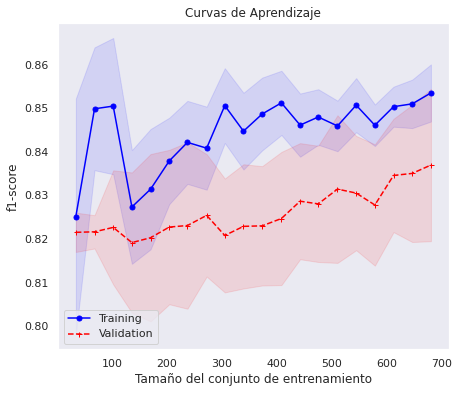

In [27]:
#Define los tamaños de conjunto de entrenamiento a usar
delta_train_sz = np.linspace(.05, 1, 20)
#Define modelo a trabajar en esta sección
mejor_modelo_LR = LogisticRegression(max_iter=3000, random_state=45, 
                                     C=mejores_params_LR.get('C'), 
                                     solver=mejores_params_LR.get('solver'),
                                     class_weight=mejores_params_LR.get('class_weight'),
                                     penalty=mejores_params_LR.get('penalty'),
                                     l1_ratio=mejores_params_LR.get('l1_ratio'),
)

pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", mejor_modelo_LR )])
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                 X = X_train,
                                                 y = Y_train,
                                                 scoring=make_scorer(f1),
                                                 cv = cv,
                                                 train_sizes = delta_train_sz,
                                                 random_state=45)    
# Obtenemos el gráfico con las curvas de aprendizaje:
print('MODELO: LR\n---------------------------')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'f1-score')

FALTA: Subentrenado....

###*c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones.*



In [28]:
mi_modelo_DT = DecisionTreeClassifier()

#Parámetros requeridos: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
#Como definimos primero el Bosque Aleatorio y lo parecido de los algoritmos decidimos
#usar un diccionario muy parecido
dicc_grid = {'ccp_alpha':np.linspace(0.0, 0.04, 3),
             'criterion':['gini', 'entropy'],
             #No cambiar!!! En la tarea se piden mínimo 10 pruebas de max_depth
             'max_depth':range(1, 21, 2),
             'min_samples_split':range(2, 12),
             'class_weight':[None,'balanced']}

grid = GridSearchCV(estimator=mi_modelo_DT, param_grid=dicc_grid, cv=cv, scoring=make_scorer(precision))
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)
# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruza
# lo cual implica también un mayor tiempo de entrenamiento.
grid.fit(Xx, np.ravel(Y_train))
print('Precisión a superar:\n------------------')
print('mean Precisión: %.3f (%.4f)\n' % (np.mean(scores['test_precision']), np.std(scores['test_precision'])))
print('Mejor valor de Precisión obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

#Guardamos los mejores hiperparámetros extraídos del barrido con GridSearchCV
mejores_params_DT = grid.best_params_


Precisión a superar:
------------------
mean Precisión: 0.766 (0.0132)

Mejor valor de Precisión obtenido con la mejor combinación: 0.8766681445310363
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
Métrica utilizada: make_scorer(precision)


### ¿Cuál es la utilidad de la métrica “precision”?
La precisión es la proporción de predicciones positivas que son correctas. De una manera más simple, es la capacidad de un modelo para no etiquetar como positivo un ejemplo que es negativo.

De ese modo, nos sirve para determinar qué cantidad de predicciones positivas son correctas del total de predicciones positivas que se hicieron.

###*d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.*


MODELO: DT
---------------------------


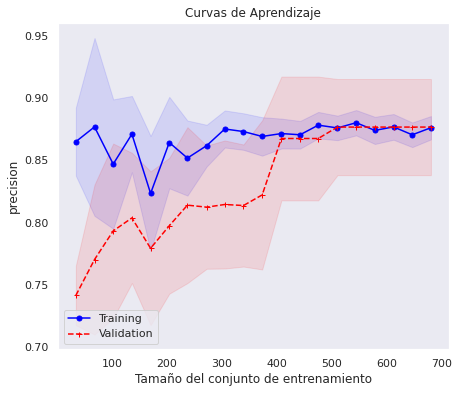

In [29]:

mejor_modelo_DT = DecisionTreeClassifier(ccp_alpha=mejores_params_DT.get('ccp_alpha'),
                                criterion=mejores_params_DT.get('criterion'),
                                max_depth=mejores_params_DT.get('max_depth'),
                                min_samples_split=mejores_params_DT.get('min_samples_split'),
                                class_weight=mejores_params_DT.get('class_weight'))

delta_train_sz = np.linspace(.05, 1, 20)
pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", mejor_modelo_DT)])
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                 X = X_train,
                                                 y = Y_train,
                                                 #Cambiar a precision
                                                 scoring=make_scorer(precision),
                                                 cv = cv,
                                                 train_sizes = delta_train_sz,
                                                 random_state=45)    
# Obtenemos el gráfico con las curvas de aprendizaje:
print('MODELO: DT\n---------------------------')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'precision')

###*e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”.*
###*NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo*

In [30]:
mi_modelo_RF = RandomForestClassifier()
#ccp_alpha, criterion, max_depth, min_samples_split y class_weight

#Probamos inicialmente con múltiple diccionarios
#================================================
#dicc_grid = {'ccp_alpha':[0.01,0.02,0.03],'criterion':['gini','entropy']}
#cc_alpha y criterion ya estan optimizadas
#dicc_grid = {'ccp_alpha':[0.01,0.02,0.03],'criterion':['gini','entropy'],'max_depth':[7, 8, 9, 10, 11]}
#max_depth ya está optimizada
#dicc_grid = {'ccp_alpha':[0.1, 0.2],
#             'criterion':['gini','entropy'],
#             'max_depth':[6, 7, 8, 9, 10],
#             'min_samples_split':[6, 7, 8, 9]}
#se optimiza min_samples_split y se finaliza con class_weight
#dicc_grid = {'ccp_alpha':np.linspace(0.0, 0.0004, 3),
#             'criterion':['gini',],
#             'max_depth':range(1, 21),
#             'min_samples_split':[4],
#             'class_weight':[None, 'balanced_subsample','balanced']}
#Uno de los mejores:
dicc_grid = {'ccp_alpha':np.linspace(0.0, 0.0004, 2),
             'criterion':['gini',],
             'max_depth':[1],
             'min_samples_split':[4],
             'class_weight':[None]}
#FINALES
'''
dicc_grid = {'ccp_alpha':[0.0, 0.0001, 0.001, 0.01, 0.01],
             'criterion':['gini','entropy'],
             'max_depth':range(1,21,2),
             'min_samples_split':range(2, 12),
             'class_weight':[None, 'balanced_subsample','balanced']}'''
#================================================

grid = GridSearchCV(estimator=mi_modelo_RF, param_grid=dicc_grid, cv=cv, scoring=make_scorer(recall))
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)
# Llevamos a cabo el proceso de entrenamiento con validación-cruzada y búsqueda de malla
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruza
# lo cual implica también un mayor tiempo de entrenamiento.
grid.fit(Xx, np.ravel(Y_train))
print('Recall a superar:\n------------------')
print('mean recall: %.3f (%.4f)\n' % (np.mean(scores['test_recall']), np.std(scores['test_recall'])))
print('Mejor valor de recall obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

#Modelo con los mejores hiperparámetros extraídos del del barrido con GridSearchCV
mejor_modelo_RF = RandomForestClassifier(ccp_alpha=grid.best_params_.get('ccp_alpha'),
                                criterion=grid.best_params_.get('criterion'),
                                max_depth=grid.best_params_.get('max_depth'),
                                min_samples_split=grid.best_params_.get('min_samples_split'),
                                class_weight=grid.best_params_.get('class_weight'))

#Guardamos los mejores hiperparámetros extraídos del barrido con GridSearchCV
mejores_params_RF = grid.best_params_

Recall a superar:
------------------
mean recall: 0.901 (0.0253)

Mejor valor de recall obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 4}
Métrica utilizada: make_scorer(recall)


###*¿Cuál es la utilidad de la métrica “recall”?*
El recall es la proporción de verdaderos positivos que son correctos. De una manera más simple, es la capacidad de un modelo para encontrar todos los ejemplos positivos. A diferencia de la precisión, esta métrica nos dice, del total de los verdaderos positivos reales, qué cantidad de ellos fueron correctamente etiquetados.

###*f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.*

MEJOR MODELO RF
---------------------------


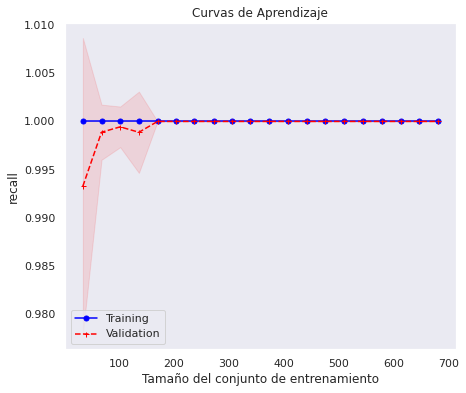

In [31]:
delta_train_sz = np.linspace(.05, 1, 20)

pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", mejor_modelo_RF)])
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                 X = X_train,
                                                 y = Y_train,
                                                 scoring=make_scorer(recall),
                                                 cv = cv,
                                                 train_sizes = delta_train_sz,
                                                 random_state=45)    
# Obtenemos el gráfico con las curvas de aprendizaje:
print('MEJOR MODELO RF\n---------------------------')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'recall')


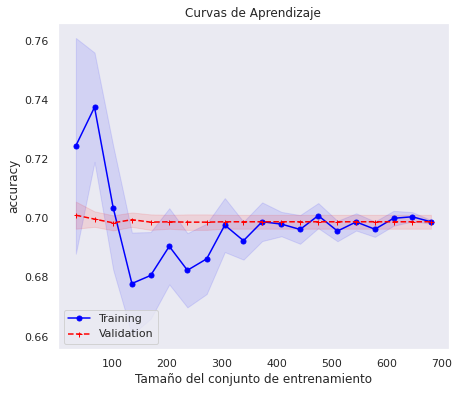

In [36]:
# No es requerido pero sólo por curiosidad miremos la métrica 
# accuracy para este modelo
r_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,
                                                 X = X_train,
                                                 y = Y_train,
                                                 scoring=make_scorer(accuracy),
                                                 cv = cv,
                                                 train_sizes = delta_train_sz,
                                                 random_state=45)

mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'accuracy')



Aquí mostramos un modelo mejor contrastando como al bajar el recall la exactitud sube.


modelo = RandomForestClassifier(ccp_alpha=0.01,
                                criterion='gini',
                                max_depth=7,
                                min_samples_split=5)

MODELO ADICIONAL RF
---------------------------


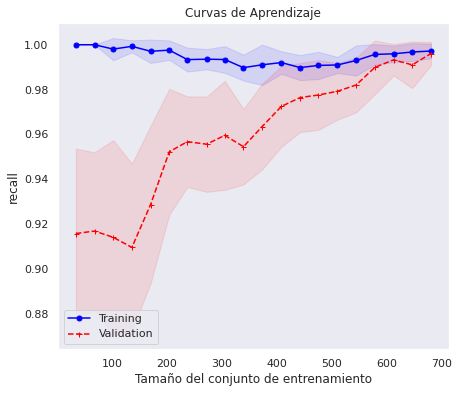

In [52]:
modelo_RF_adicional = RandomForestClassifier(ccp_alpha=0.01, criterion='gini', max_depth=7, min_samples_split=5)

pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", modelo_RF_adicional)])
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                 X = X_train,
                                                 y = Y_train,
                                                 scoring=make_scorer(recall),
                                                 cv = cv,
                                                 train_sizes = delta_train_sz,
                                                 random_state=40)    
# Obtenemos el gráfico con las curvas de aprendizaje:
print('MODELO ADICIONAL RF\n---------------------------')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'recall')

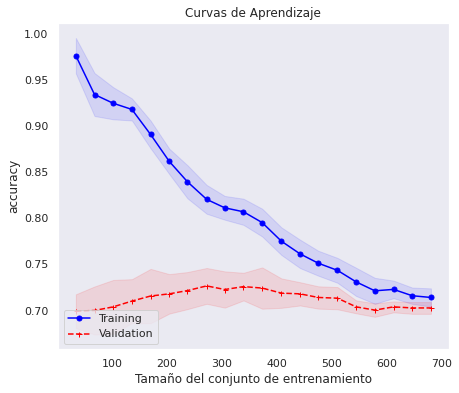

In [53]:
r_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,
                                                 X = X_train,
                                                 y = Y_train,
                                                 scoring=make_scorer(accuracy),
                                                 cv = cv,
                                                 train_sizes = delta_train_sz,
                                                 random_state=45)

mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'accuracy')

###*¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.*

El recall es la proporción de verdaderos positivos que son correctos. De una manera más simple, es la capacidad de un modelo para encontrar todos los ejemplos positivos. A diferencia de la precisión, esta métrica nos dice, del total de los verdaderos positivos reales, qué cantidad de ellos fueron correctamente etiquetados.

Se observa que aunque el recall es del 100%, la exactitud es sólo del 70%

El recall no es una buena métrica a utilizar con conjuntos de datos desbalanceados....



#**Ejercicio-6.**
#Obtención de los modelos finales


###*a. Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.*


In [33]:
#Imprimimos los parámetros del mejor modelo
print('MODELO: REGRESION LOGISTICA\n========================\nMejores parámetros:\n')
print(mejores_params_LR)

#Entrenamos un nuevo clasificador con el mejor modelo
clf = mejor_modelo_LR.fit(X_train, Y_train)   # Entrenamos con el conjunto de prueba para obtener nuestro primer clasificador (clf)

#Usamos el mismo conjunto de entrenamiento para predecir que se obtendría
predi = clf.predict(X_train)

#Obtenemos el score utilizado para este modelo
print('F1-score en el conjunto de entrenamiento: %.2f' % f1(Y_train, predi))

#Ahora hacemos que el clasificador clasifique nuestro conjunto de pruebas que no ha sido
#usado hasta el momento.
predi = clf.predict(X_test)

#Finalmente obtenemos nuestro score con el conjunto de pruebas
print('F1-score en el conjunto de prueba: %.2f' % f1(Y_test, predi))



MODELO: REGRESION LOGISTICA
Mejores parámetros:

{'C': 0.11, 'class_weight': None, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'saga'}
F1-score en el conjunto de entrenamiento: 0.83
F1-score en el conjunto de prueba: 0.83


CONCLUSIONES LR:


###*b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.*


In [45]:
#Imprimimos los parámetros del mejor modelo
print('MODELO: ARBOL DE DECISION\n========================\nMejores parámetros:\n')
print(mejores_params_DT)

#Entrenamos un nuevo clasificador con el mejor modelo
clf = mejor_modelo_DT.fit(X_train, Y_train)   # Entrenamos con el conjunto de prueba para obtener nuestro primer clasificador (clf)

#Usamos el mismo conjunto de entrenamiento para predecir que se obtendría
predi = clf.predict(X_train)

#Obtenemos el score utilizado para este modelo
print('Precisión en el conjunto de entrenamiento: %.2f' % precision(Y_train, predi))

#Ahora hacemos que el clasificador clasifique nuestro conjunto de pruebas que no ha sido
#usado hasta el momento.
predi = clf.predict(X_test)

#Finalmente obtenemos nuestro score con el conjunto de pruebas
print('Precisión en el conjunto de prueba: %.2f' % precision(Y_test, predi))



MODELO: ARBOL DE DECISION
Mejores parámetros:

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
Precisión en el conjunto de entrenamiento: 0.86
Precisión en el conjunto de prueba: 0.92


CONCLUSIONES DT:
.




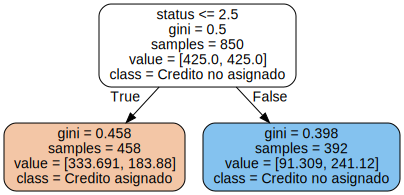

In [48]:



export_graphviz(
    clf,
    out_file="miDT.dot",
    feature_names=list(pd.DataFrame(X_train).columns.values),
    class_names=['Credito asignado' , 'Credito no asignado'],
rounded=True,
filled=True
)

Source.from_file("miDT.dot")



###*c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.*

In [37]:
#Imprimimos los parámetros del mejor modelo
print('MODELO: BOSQUE ALEATORIO\n========================\nMejores parámetros:\n')
print(mejores_params_RF)

#Entrenamos un nuevo clasificador con el mejor modelo
clf = mejor_modelo_RF.fit(X_train, Y_train)   # Entrenamos con el conjunto de prueba para obtener nuestro primer clasificador (clf)

#Usamos el mismo conjunto de entrenamiento para predecir que se obtendría
predi = clf.predict(X_train)

#Obtenemos el score utilizado para este modelo
print('Recall en el conjunto de entrenamiento: %.2f' % recall(Y_train, predi))

#Ahora hacemos que el clasificador clasifique nuestro conjunto de pruebas que no ha sido
#usado hasta el momento.
predi = clf.predict(X_test)

#Finalmente obtenemos nuestro score con el conjunto de pruebas
print('Recall en el conjunto de prueba: %.2f' % recall(Y_test, predi))


MODELO: BOSQUE ALEATORIO
Mejores parámetros:

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 4}
Recall en el conjunto de entrenamiento: 1.00
Recall en el conjunto de prueba: 1.00
Exactitud en el conjunto de prueba: 0.71


CONCLUSIONES DT

#**Bibliografía**

Sadangi, S., (21 de Julio de 2022). How to Deal With Files in Google Colab: Everything You Need to Know. *Neptune Labs.* https://neptune.ai/blog/google-colab-dealing-with-files

Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and
TensorFlow. O’Reilly Media, Inc.

scikit-learn.org. (s.f.). *sklearn.linear_model.LogisticRegression* scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression

scikit-learn.org. (s.f.). *Common pitfalls in the interpretation of coefficients of linear models.* scikit-learn.org. https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

scikit-learn.org. (s.f.). *sklearn.model_selection.GridSearchCV* scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



###**Fin de la Actividad de la semana 6.**